# Neural network with one hidden layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss, f1_score, accuracy_score

from simple_nn import OneLayerNN

from utils.data_utils import cluster_dataset, plot_decision_boundary

In [2]:
# Load data
X, y = cluster_dataset()

Text(0.5, 0, 'x1')

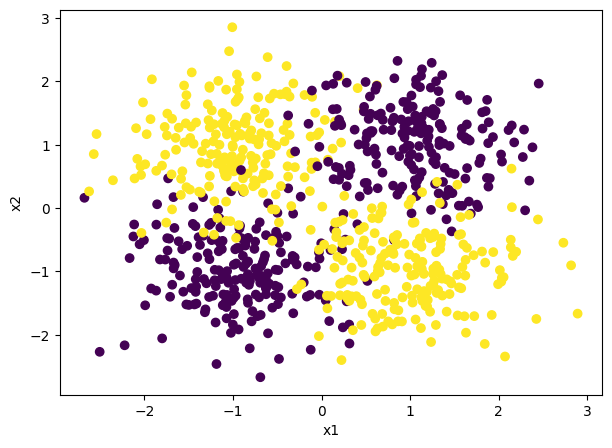

In [3]:
# Visualize the data
plt.figure(figsize=(7, 5))
plt.scatter(X[0, :], X[1, :], c=y)
plt.ylabel('x2')
plt.xlabel('x1')

In [4]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')
print(f'Nr of training examples: {y.shape[1]}')

Shape of X: (2, 800)
Shape of y: (1, 800)
Nr of training examples: 800


> Note that now the rows of `X` are corresponding to the nr of features, while the columns correspond to the nr of examples.

## Train classic logistic classifier

Let's train a standard logistic classifier on this dataset and see how it performs.

Accuracy: 0.5025
Logloss: 17.183239156832038
F1 score: 0.5012531328320802


/Users/a963850/Documents/github/deep-learning/deep-learning-fundamentals/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


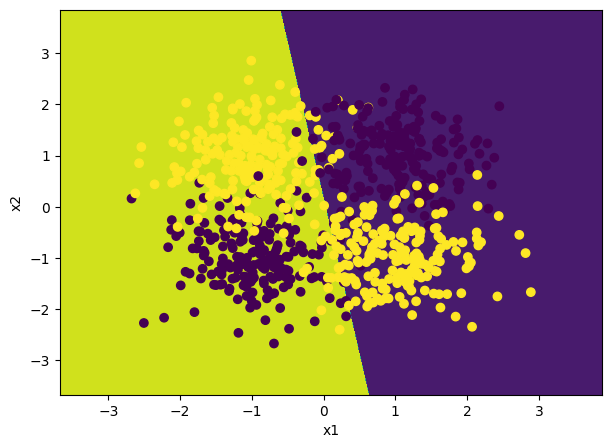

In [5]:
# Train logistic classifier
clf = LogisticRegressionCV()
clf.fit(X.T, y.T)

# Plot decision boundary
plot_decision_boundary(lambda x: clf.predict(x), X, y)

# Performance metrics
y_pred = clf.predict(X.T)

print(f'Accuracy: {accuracy_score(y.T, y_pred)}')
print(f'Logloss: {log_loss(y.T, y_pred)}')
print(f'F1 score: {f1_score(y.T, y_pred)}')

As can be seen this model is not performing that good since the data is not linearly separable.

## Train neural network classifier

Now let's try to train our custom neural network with one hidden layer with four units on the dataset and see how it performs.

In [6]:
# Instantiate model
model = OneLayerNN()

# Train classifier
model.call(X, y, learning_rate=0.1, print_cost=True)

Cost after iteration 0: 0.6931467973721869
Cost after iteration 1000: 0.6931382365391002
Cost after iteration 2000: 0.6930990126047786
Cost after iteration 3000: 0.693020959414019
Cost after iteration 4000: 0.6927289141840255
Cost after iteration 5000: 0.5023818702518877
Cost after iteration 6000: 0.3811665302359426
Cost after iteration 7000: 0.2507376830658017
Cost after iteration 8000: 0.231686764663189
Cost after iteration 9000: 0.22827510766581433


In [7]:
# Performance metrics
model_pred = model.predict(X)

print(f'Accuracy: {accuracy_score(y.T, model_pred)}')
print(f'Logloss: {log_loss(y.T, model_pred)}')
print(f'F1 score: {f1_score(y.T, model_pred)}')

Accuracy: 0.905
Logloss: 3.2812247368848126
F1 score: 0.9057071960297767


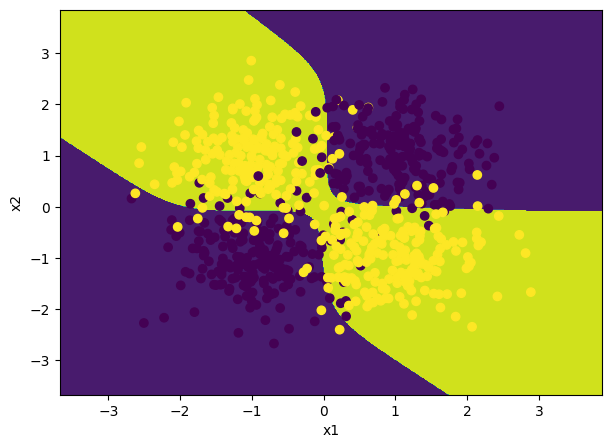

In [9]:
# Plot decision boundary
plot_decision_boundary(lambda x: model.predict(x.T), X, y)